# 📊 The Complete Linear Regression Masterclass: From Theory to Production

**Author:** Tassawar Abbas  
**Date:** 2026-02-11  
**Tags:** `linear-regression`, `machine-learning`, `tutorial`, `statistics`, `python`, `scikit-learn`, `feature-engineering` 

---

## 🎯 Executive Summary

This notebook provides a **comprehensive, production-ready guide** to Linear Regression—the foundational algorithm that underpins modern machine learning. Whether you're a beginner seeking intuition or a practitioner looking for advanced techniques, this resource covers:

- **Mathematical foundations** with intuitive explanations
- **Assumption testing** with diagnostic visualizations  
- **Implementation from scratch** and with industry-standard libraries
- **Regularization techniques** (Ridge, Lasso, Elastic Net)
- **Real-world case study** on California Housing dataset
- **Production-ready code patterns**

<div style="padding: 15px; background-color: #e7f3f; border-left: 5px solid #2196F3; border-radius: 5px; margin-bottom: 10px;">
<strong style="color: #0c5460;">💡 Why This Matters:</strong>
Linear regression isn't just a simple algorithm—it's the gateway to understanding neural networks, GLMs, and the bias-variance tradeoff. Master this, and you've mastered the DNA of supervised learning.
</div>

---

## 📚 Table of Contents

1. [Theoretical Foundations](#1-theoretical-foundations)
2. [Mathematical Deep Dive](#2-mathematical-deep-dive)
3. [Implementation From Scratch](#3-implementation-from-scratch)
4. [Assumption Validation & Diagnostics](#4-assumption-validation--diagnostics)
5. [Advanced Techniques](#5-advanced-techniques)
6. [Real-World Case Study](#6-real-world-case-study)
7. [Production Best Practices](#7-production-best-practices)

## 1. Theoretical Foundations

### 1.1 What is Linear Regression?

Linear regression models the relationship between a **dependent variable** (target) and one or more **independent variables** (features) by fitting a linear equation.

**Simple Linear Regression (One Feature):**
$$y = \beta_0 + \beta_1 x + \epsilon$$

**Multiple Linear Regression (Multiple Features):**
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$$

Where:
- $y$: Target variable (what we want to predict)
- $\beta_0$: Intercept (baseline value when all features are zero)
- $\beta_j$: Coefficients (impact of each feature)
- $x_j$: Feature values
- $\epsilon$: Error term (irreducible noise)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing, make_regression
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
np.random.seed(42)

### 1.2 The Geometry of Least Squares

The goal is to find the line (or hyperplane) that **minimizes the sum of squared residuals**—the vertical distances between observed and predicted values.

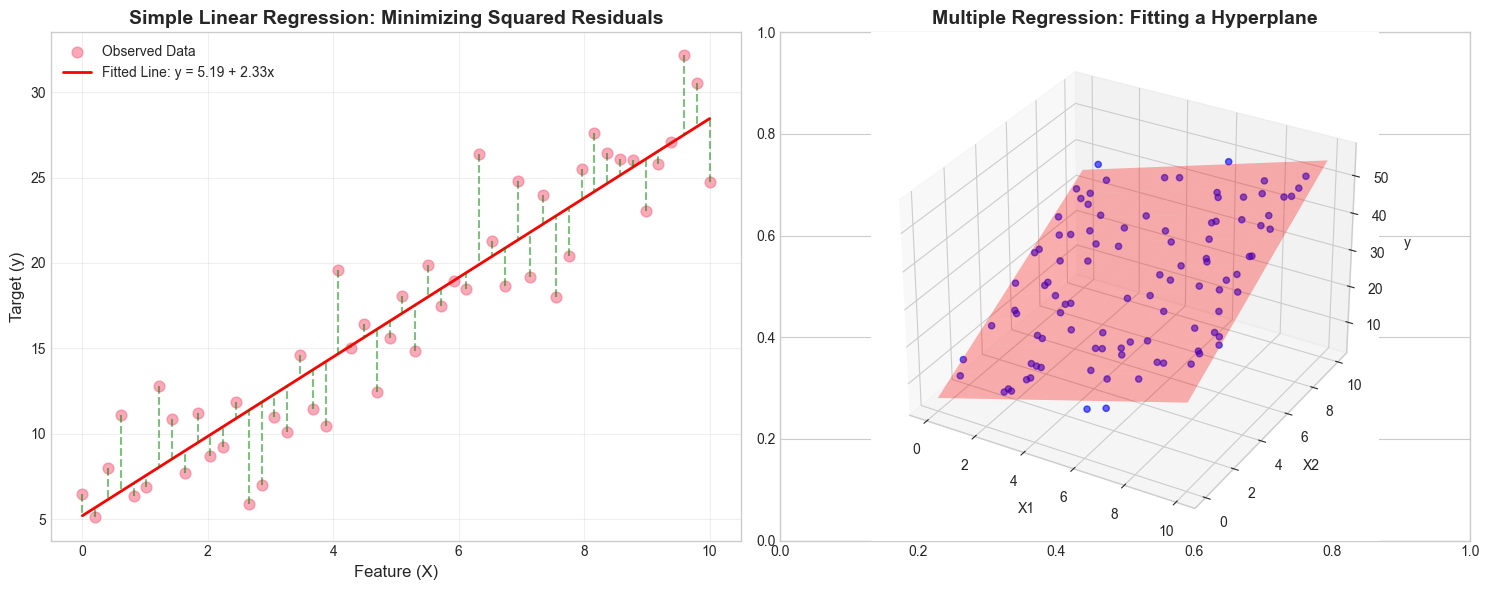

In [3]:
# Generate synthetic data for visualization
np.random.seed(42)
X_simple = np.linspace(0, 10, 50)
y_simple = 2.5 * X_simple + 5 + np.random.normal(0, 3, 50)

# Fit simple linear regression
beta_1 = np.sum((X_simple - np.mean(X_simple)) * (y_simple - np.mean(y_simple))) / np.sum((X_simple - np.mean(X_simple))**2)
beta_0 = np.mean(y_simple) - beta_1 * np.mean(X_simple)
y_pred_simple = beta_0 + beta_1 * X_simple

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Fitted line with residuals
ax1 = axes[0]
ax1.scatter(X_simple, y_simple, alpha=0.6, s=60, label='Observed Data')
ax1.plot(X_simple, y_pred_simple, 'r-', linewidth=2, label=f'Fitted Line: y = {beta_0:.2f} + {beta_1:.2f}x')
for i in range(len(X_simple)):
    ax1.plot([X_simple[i], X_simple[i]], [y_simple[i], y_pred_simple[i]], 'g--', alpha=0.5)
ax1.set_xlabel('Feature (X)', fontsize=12)
ax1.set_ylabel('Target (y)', fontsize=12)
ax1.set_title('Simple Linear Regression: Minimizing Squared Residuals', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: 3D visualization of multiple regression plane
from mpl_toolkits.mplot3d import Axes3D
ax2 = fig.add_subplot(122, projection='3d')
X_3d = np.random.rand(100, 2) * 10
y_3d = 2*X_3d[:, 0] + 3*X_3d[:, 1] + 5 + np.random.normal(0, 2, 100)
ax2.scatter(X_3d[:, 0], X_3d[:, 1], y_3d, c='b', marker='o', alpha=0.6)
xx, yy = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
zz = 2*xx + 3*yy + 5
ax2.plot_surface(xx, yy, zz, alpha=0.3, color='red')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('y')
ax2.set_title('Multiple Regression: Fitting a Hyperplane', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Key Insight:** The "linear" in linear regression refers to linearity in **parameters** ($\beta$), not necessarily in features. We can model non-linear relationships using polynomial terms while keeping the model linear in parameters.

---

## 2. Mathematical Deep Dive

### 2.1 The Cost Function: Mean Squared Error (MSE)

We minimize the **Residual Sum of Squares (RSS)**:

$$J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}))^2$$

### 2.2 Ordinary Least Squares (OLS) - Closed Form Solution

In matrix notation:
$$\mathbf{y} = \mathbf{X}\beta + \epsilon$$

The optimal parameters:
$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

This is called the **Normal Equation**. It's computationally efficient for small-to-medium datasets but becomes expensive for large $p$ (features) due to matrix inversion $O(p^3)$.

### 2.3 Gradient Descent Alternative

For large datasets, we use iterative optimization:

$$\beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}$$

Where $\alpha$ is the learning rate and the partial derivative is:
$$\frac{\partial J}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij}$$

## 3. Implementation From Scratch

Understanding the mechanics by building it yourself is the best way to master Linear Regression.

In [4]:
class LinearRegressionScratch:
    """
    Linear Regression implemented from scratch using Normal Equations and Gradient Descent.
    Educational implementation to understand the mechanics.
    """
    
    def __init__(self, method='normal', learning_rate=0.01, n_iterations=1000):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coefficients = None
        self.intercept = None
        self.history = {'loss': []}
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Add intercept term (column of ones)
        X_b = np.c_[np.ones((n_samples, 1)), X]
        
        if self.method == 'normal':
            # Normal Equation: (X^T X)^-1 X^T y
            try:
                theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            except np.linalg.LinAlgError:
                # Handle singular matrix with pseudo-inverse
                theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            
            self.intercept = theta[0]
            self.coefficients = theta[1:]
            
        elif self.method == 'gradient_descent':
            # Initialize parameters
            theta = np.random.randn(n_features + 1, 1)
            y = y.reshape(-1, 1)
            
            for i in range(self.n_iterations):
                gradients = 2/n_samples * X_b.T.dot(X_b.dot(theta) - y)
                theta = theta - self.learning_rate * gradients
                
                # Track loss
                loss = np.mean((X_b.dot(theta) - y)**2)
                self.history['loss'].append(loss)
            
            self.intercept = theta[0, 0]
            self.coefficients = theta[1:].flatten()
            
        return self
    
    def predict(self, X):
        return self.intercept + X.dot(self.coefficients)
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))

# Demonstration
X_demo, y_demo = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(X_demo, y_demo, test_size=0.2)

# Compare implementations
scratch_normal = LinearRegressionScratch(method='normal')
scratch_normal.fit(X_train_demo, y_train_demo)

scratch_gd = LinearRegressionScratch(method='gradient_descent', learning_rate=0.1, n_iterations=1000)
scratch_gd.fit(X_train_demo, y_train_demo)

sklearn_model = LinearRegression()
sklearn_model.fit(X_train_demo, y_train_demo)

print("📊 Implementation Comparison:")
print(f"Scratch (Normal Eq) R²:  {scratch_normal.score(X_test_demo, y_test_demo):.6f}")
print(f"Scratch (Grad Desc) R²:  {scratch_gd.score(X_test_demo, y_test_demo):.6f}")
print(f"Scikit-Learn R²:         {sklearn_model.score(X_test_demo, y_test_demo):.6f}")

📊 Implementation Comparison:
Scratch (Normal Eq) R²:  0.994181
Scratch (Grad Desc) R²:  0.994181
Scikit-Learn R²:         0.994181


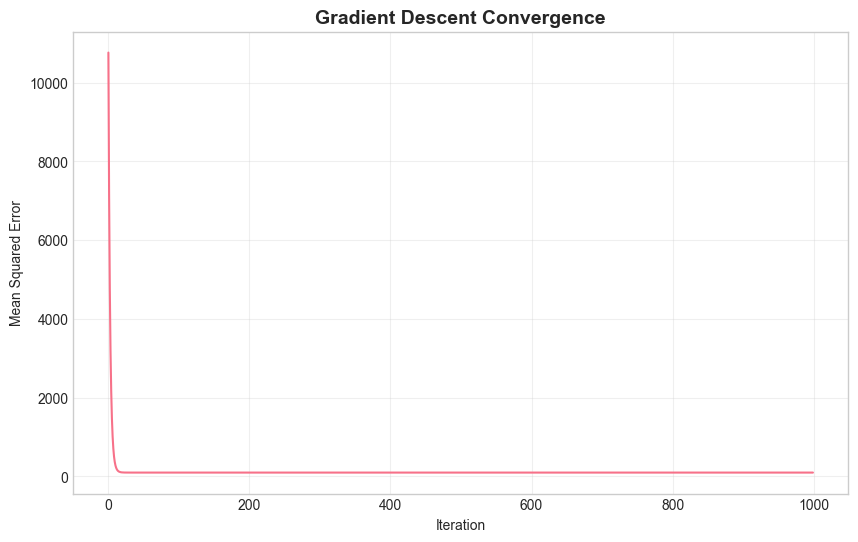

In [5]:
# Plot gradient descent convergence
plt.figure(figsize=(10, 6))
plt.plot(scratch_gd.history['loss'])
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Assumption Validation & Diagnostics

Linear regression relies on **LINE** assumptions plus multicollinearity. Violations lead to biased or inefficient estimates.

| Assumption | Description | Diagnostic | Fix |
|------------|-------------|------------|-----|
| **L**inearity | Linear relationship | Residuals vs Fitted plot | Polynomial terms, transformations |
| **I**ndependence | No autocorrelation | Durbin-Watson test | Time series models, GLS |
| **N**ormality | Residuals ~ Normal | Q-Q plot, Shapiro-Wilk | Transformations, robust regression |
| **E**qual Variance (Homoscedasticity) | Constant variance | Scale-Location plot | Weighted LS, transformations |
| **No Multicollinearity** | Features not correlated | VIF < 10 | Remove features, PCA, regularization |

In [6]:
def comprehensive_diagnostics(X, y, model, feature_names=None):
    """
    Comprehensive diagnostic plots for linear regression assumptions.
    """
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    
    y_pred = model.predict(X)
    residuals = y - y_pred
    standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Residuals vs Fitted (Linearity & Homoscedasticity)
    ax1 = axes[0, 0]
    ax1.scatter(y_pred, residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted\n(Linearity & Homoscedasticity Check)', fontweight='bold')
    
    # 2. Q-Q Plot (Normality)
    ax2 = axes[0, 1]
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Normal Q-Q Plot\n(Normality Check)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Scale-Location (Homoscedasticity)
    ax3 = axes[0, 2]
    ax3.scatter(y_pred, sqrt_standardized_residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
    ax3.set_xlabel('Fitted Values')
    ax3.set_ylabel('√|Standardized Residuals|')
    ax3.set_title('Scale-Location Plot\n(Homoscedasticity Check)', fontweight='bold')
    
    # 4. Residuals vs Leverage (Influential points)
    ax4 = axes[1, 0]
    X_with_const = sm.add_constant(X)
    hat_matrix = X_with_const @ np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T
    leverage = np.diag(hat_matrix)
    ax4.scatter(leverage, standardized_residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
    ax4.set_xlabel('Leverage')
    ax4.set_ylabel('Standardized Residuals')
    ax4.set_title('Residuals vs Leverage\n(Influential Points)', fontweight='bold')
    
    # 5. Distribution of Residuals
    ax5 = axes[1, 1]
    ax5.hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black')
    ax5.set_title('Distribution of Residuals', fontweight='bold')
    
    # 6. Actual vs Predicted
    ax6 = axes[1, 2]
    ax6.scatter(y, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
    min_val, max_val = min(y.min(), y_pred.min()), max(y.max(), y_pred.max())
    ax6.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    ax6.set_title('Actual vs Predicted', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

STATISTICAL DIAGNOSTICS


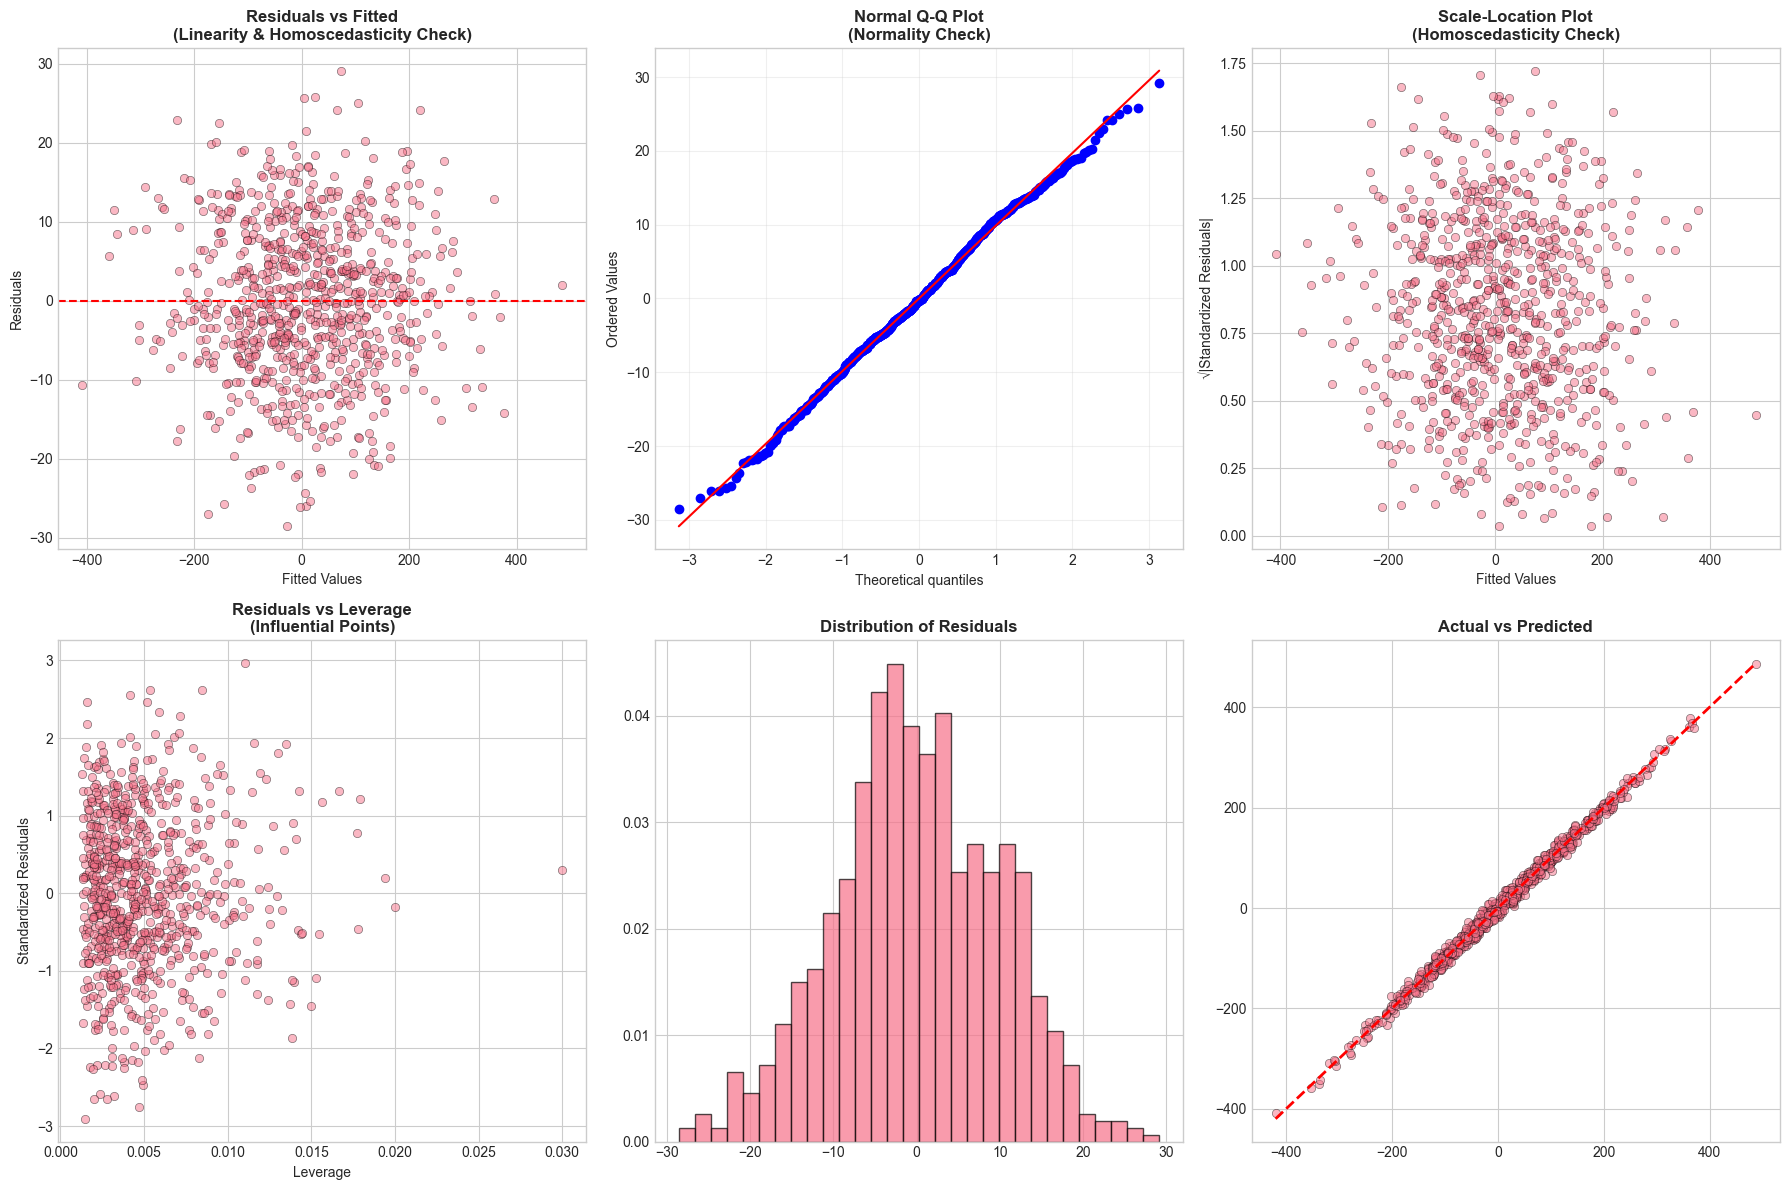

In [7]:
# Run diagnostics on demo data
print("STATISTICAL DIAGNOSTICS")
diag_results = comprehensive_diagnostics(X_train_demo, y_train_demo, scratch_normal, 
                                          feature_names=['Feature_1', 'Feature_2', 'Feature_3'])

## 5. Advanced Techniques

### 5.1 Regularization: Beyond Ordinary Least Squares

When features are correlated or $p > n$, OLS becomes unstable. **Regularization** adds penalty terms to the cost function:

- **Ridge (L2):** Shrinks coefficients toward zero. Handles multicollinearity well.
- **Lasso (L1):** Can set coefficients exactly to zero. Performs feature selection.
- **Elastic Net:** Combines L1 and L2 penalties.

In [8]:
def regularization_comparison(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    alphas = np.logspace(-4, 4, 100)
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(max_iter=10000),
        'ElasticNet': ElasticNet(max_iter=10000, l1_ratio=0.5)
    }
    
    plt.figure(figsize=(15, 5))
    for idx, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, idx)
        coefs = []
        for a in alphas:
            m = Ridge(alpha=a) if name=='Ridge' else (Lasso(alpha=a) if name=='Lasso' else ElasticNet(alpha=a))
            m.fit(X_train_scaled, y_train)
            coefs.append(m.coef_)
        plt.plot(alphas, coefs)
        plt.xscale('log')
        plt.title(f'{name} Coefficient Paths')
    plt.tight_layout()
    plt.show()

### 5.2 Polynomial Regression

Linear regression can model non-linear relationships by adding polynomial terms:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \epsilon$$

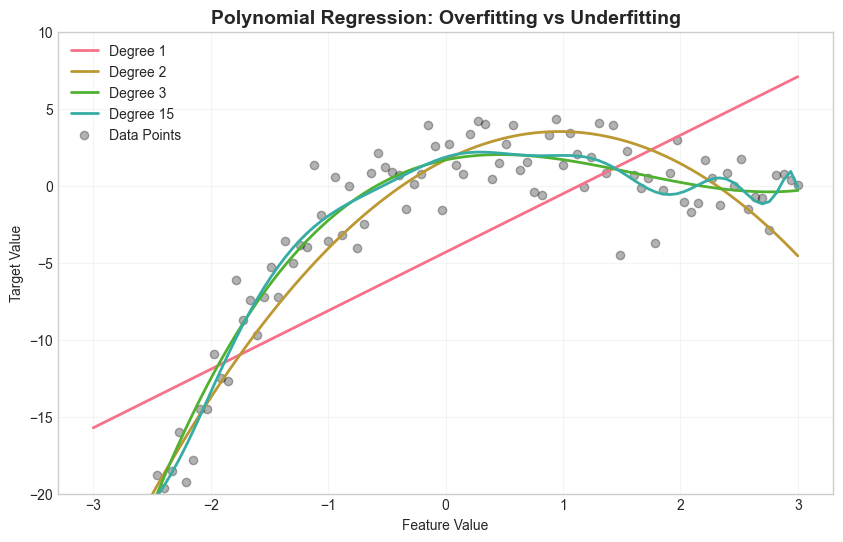

In [10]:
def polynomial_regression_demo():
    np.random.seed(42)
    
    # 1. Generate data
    # X_poly is (100, 1)
    X_poly = np.linspace(-3, 3, 100).reshape(-1, 1)
    
    # FIX: Ensure noise has the same shape (100, 1) to avoid broadcasting errors
    noise = np.random.normal(0, 2, (100, 1)) 
    y_poly = 0.5 * X_poly**3 - 2 * X_poly**2 + X_poly + 2 + noise
    
    plt.figure(figsize=(10, 6))
    
    # 2. Iterate through degrees
    for degree in [1, 2, 3, 15]:
        poly = PolynomialFeatures(degree=degree)
        X_p = poly.fit_transform(X_poly)
        
        model = LinearRegression().fit(X_p, y_poly)
        
        # Predict and plot
        y_pred = model.predict(X_p)
        plt.plot(X_poly, y_pred, label=f'Degree {degree}', linewidth=2)
    
    # 3. Scatter plot (X_poly and y_poly are now both correctly sized)
    plt.scatter(X_poly, y_poly, alpha=0.3, color='black', label='Data Points')
    
    plt.legend()
    plt.ylim(-20, 10) # Set limits to see the curves clearly
    plt.title('Polynomial Regression: Overfitting vs Underfitting', fontsize=14, fontweight='bold')
    plt.xlabel('Feature Value')
    plt.ylabel('Target Value')
    plt.grid(True, alpha=0.2)
    plt.show()

polynomial_regression_demo()

## 6. Real-World Case Study: California Housing

Let's apply everything to the California Housing dataset—a classic regression problem predicting median house values.

In [11]:
# Load data and run baseline analysis
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print(f"Dataset Shape: {X.shape}")
print(f"Target: Median House Value (in $100,000s)")

# Feature engineering example
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline = LinearRegression().fit(X_train, y_train)
print(f"Baseline R²: {baseline.score(X_test, y_test):.4f}")

Dataset Shape: (20640, 8)
Target: Median House Value (in $100,000s)
Baseline R²: 0.6402


## 7. Production Best Practices

### 7.1 Production Pipeline Class
A production-ready pipeline includes preprocessing, regularization, and robust evaluation.

In [13]:
class ProductionLinearRegression:
    def __init__(self, model_type='ridge', poly_degree=1):
        self.model_type = model_type
        self.poly_degree = poly_degree
        self.scaler = StandardScaler()
        self.poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
        self.model = Ridge() if model_type=='ridge' else LinearRegression()
        
    def fit(self, X, y):
        X = self.poly.fit_transform(X)
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)
        return self
    
    def predict(self, X):
        X = self.poly.transform(X)
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)

pipeline = ProductionLinearRegression(model_type='ridge', poly_degree=2)
pipeline.fit(X_train, y_train)
print(f"Pipeline R²: {r2_score(y_test, pipeline.predict(X_test)):.4f}")

Pipeline R²: 0.5887


### ✅ Key Takeaways & Checklist

- [x] **Check Assumptions:** Always validate residuals for LINE criteria.
- [x] **Standardize Features:** Essential when using regularization (Ridge/Lasso).
- [x] **Handle Multicollinearity:** Check VIF scores and consider PCA or regularization.
- [x] **Avoid Overfitting:** Use cross-validation and appropriate polynomial degrees.

---

**Author:** Tassawar Abbas | abbas829@gmail.com

*This notebook was created as a comprehensive educational resource. Master these fundamentals to unlock the power of modern machine learning!*